<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Aula01_Processamento_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Imagens
Processamento de Imagens compreende métodos e operações para alterar, melhorra ou extraír informações de uma image. 

#Representação e Definições Básicas

* Imagem Digital
  * Uma matriz com NxM células

* Pixel
  * O menor valor de uma umagem
  * Varia 0 (black) a 255 (white) (ou 0 a 1)
  
  




  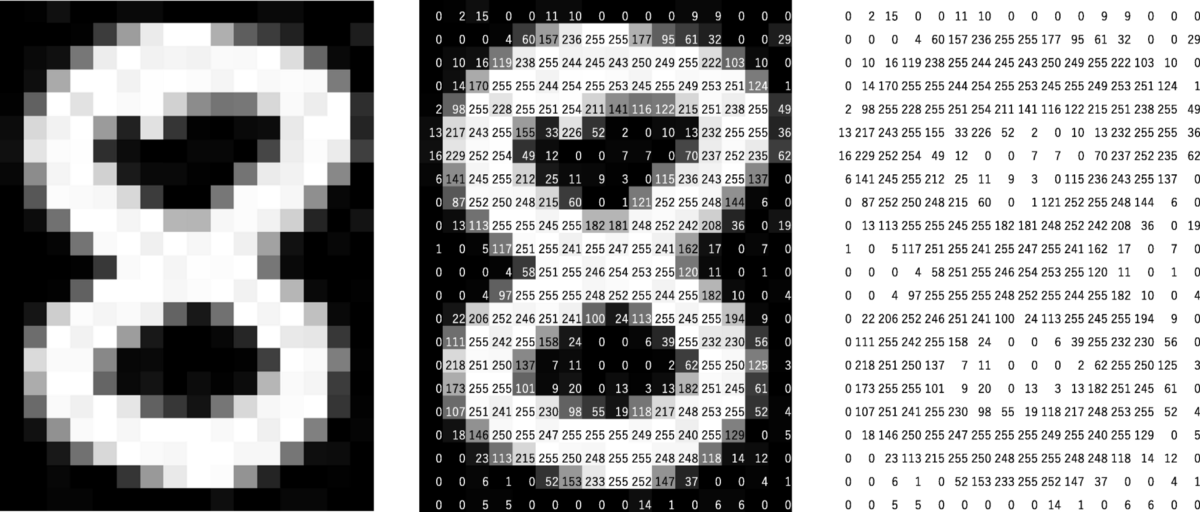



#Lendo uma imagem e plotando na tela

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#OpenCV
import cv2

!wget https://scikit-image.org/skimage-tutorials/_images/4_segmentation_15_0.png -O astronaut.png

In [ ]:
original = cv2.imread('astronaut.png')
original = cv2.cvtColor(original,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,8))
plt.imshow(original)
plt.show()

print(original.shape)
print(original[1200,300])

#Resolução vs Tamanho da Imagem

*   Resolução
  * Quantidade de pixeis por polegada da image
  * Alta resolução apresenta mais pixels por polega (PPI), resultando em um detalhe fino   
  * ppi (pixel per inch): Métrica para dispostivos digitais (i.e displays)
  * dpi (dots per inch): Métricas para dispositivos analógicos (i.e impressoras)

* Tamanho da Imagem
  Dimensão da Matriz em Pixels (NxM).


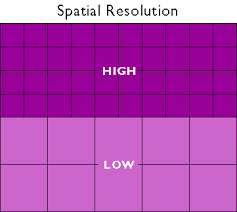 
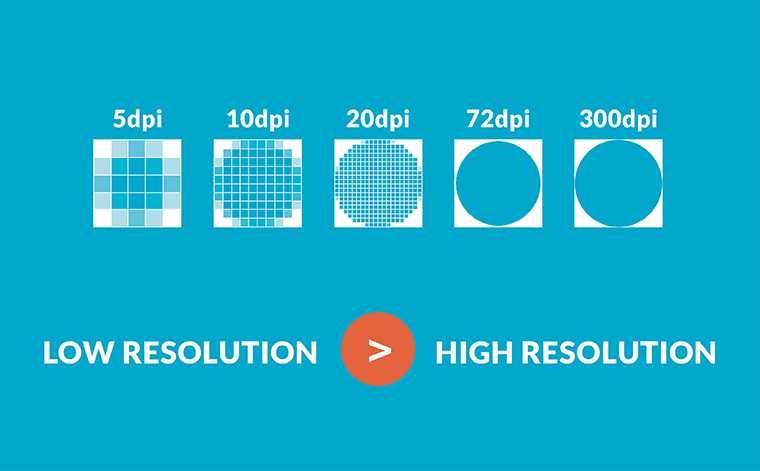
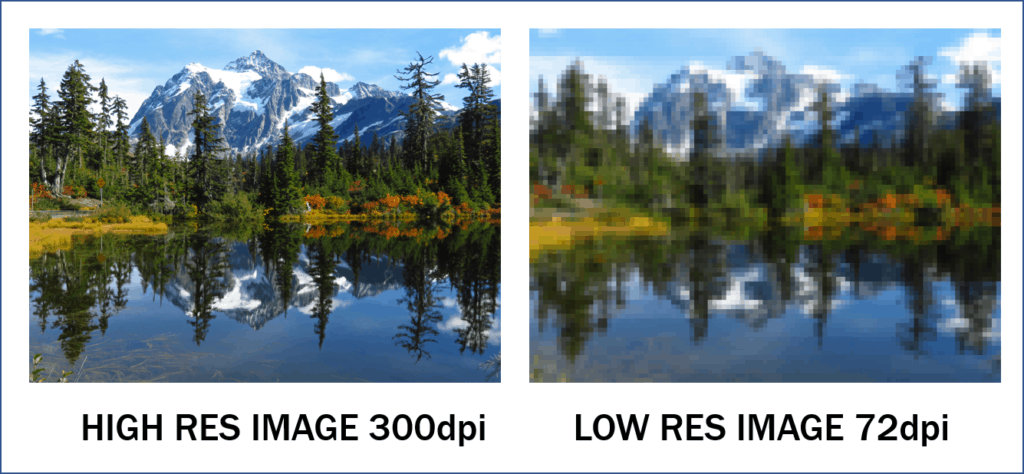

In [ ]:
image_down1 = cv2.resize(original, (512,512), interpolation= cv2.INTER_NEAREST)
image_down2 = cv2.resize(image_down1, (256,256), interpolation= cv2.INTER_NEAREST)
image_down3 = cv2.resize(image_down2, (128,128), interpolation= cv2.INTER_NEAREST)

image_down4 = cv2.resize(image_down3, (64,64), interpolation= cv2.INTER_NEAREST)

image_up1 = cv2.resize(image_down4, (128,128), interpolation= cv2.INTER_NEAREST)
image_up2 = cv2.resize(image_up1, (256,256), interpolation= cv2.INTER_NEAREST)
image_up3 = cv2.resize(image_up2, (512,512), interpolation= cv2.INTER_NEAREST)


print(original.shape)
print(image_down1.shape)
print(image_down2.shape)
print(image_down3.shape)
print(image_up1.shape)
print(image_up2.shape)
print(image_up3.shape)

In [ ]:
def display_image_in_actual_size(im_data):

    dpi = 80    
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()


display_image_in_actual_size(image_down1)
display_image_in_actual_size(image_down2)
display_image_in_actual_size(image_down3)
display_image_in_actual_size(image_down4)
display_image_in_actual_size(image_up1)
display_image_in_actual_size(image_up2)
display_image_in_actual_size(image_up3)

#Sistemas de Cor (GrayScale, RGB and HSV)



##Escala de Cinza (GrayScale)

Na escala de cinza, cada pixel determina a intensidade da luz (brilho). Assim, a imagem pode representar 255 toneladas de cinza, em que 0 determina ausência de luz (preto) e 255 representam a intensidade máxima (branco). Em alguns casos, a intensidade pode ser representada de 0,0 a 1,0.

In [ ]:
rgb = original

#Convert to gray
grayscale = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12,8))
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.show()

#Some basic information
print('GrayScale Shape:', grayscale.shape)
print('Pixel Range: ', grayscale.max(),grayscale.min())
print('Pixel Range: ', grayscale.max()*255,grayscale.min())

#Select 5 random positions to check pixel intensity
y_range = np.random.randint(512, size=5)
x_range = np.random.randint(512, size=5)

for x,y in zip(y_range,x_range):  
    print('Pixel at position [%d,%d] == %d' % (y,x,grayscale[y,x]))

##RGB

O modelo de cores RGB armazena valores individuais para vermelho, verde e azul. Neste espaço de cores, as três primárias são adicionadas para criar cores de completamente branco a completamente preto.

Basicamente, uma imagem RGB possui 3 canais para registrar a intensidade do vermelho, verde e azul. A cor é gerada por adição destes 3 canais

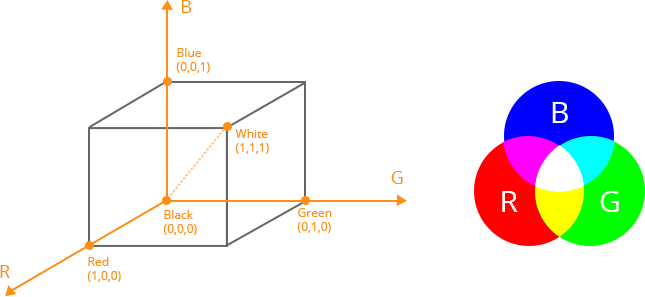



In [ ]:
rgb = original

plt.figure(figsize=(12,8))
plt.imshow(rgb)
plt.show()

#Some basic information
print('RGB Shape:', rgb.shape) 
print('Pixel Range: ', rgb.max(),rgb.min())


#Select 5 random positions to check pixel intensity
y_range = np.random.randint(512, size=5)
x_range = np.random.randint(512, size=5)

for x,y in zip(y_range,x_range):  
    print('Pixel at position [%d,%d] == RGB' % (y,x),rgb[y,x])

In [ ]:
#To better visualize, here we split each channel 

ch_r = rgb[:,:,0]
ch_g = rgb[:,:,1]
ch_b = rgb[:,:,2]

fig, axes = plt.subplots(1, 4, figsize=(8, 4))
ax = axes.ravel()


ax[0].imshow(ch_r, cmap=plt.cm.gray)
ax[0].set_title("Red Channel")
ax[1].imshow(ch_g, cmap=plt.cm.gray)
ax[1].set_title("Green Channel")
ax[2].imshow(ch_b, cmap=plt.cm.gray)
ax[2].set_title("Blue Channel")
ax[3].imshow(rgb)
ax[3].set_title("R+G+B")

y,x = 300,100
pixel_r = ch_r[y,x]
pixel_g = ch_g[y,x]
pixel_b = ch_b[y,x]
print("R: %d G: %d B: %d" % (pixel_r,pixel_g,pixel_b))

fig.tight_layout()
plt.show()

**Crie um codigo que inverte os canais B e R e veja o resultado (BGR)** 

In [8]:
#Implemente aqui
#
#

## HSV
HSV (matiz, saturação, valor), também conhecido como HSB (matiz, saturação, brilho), é frequentemente usado por artistas porque muitas vezes é mais natural pensar em uma cor em termos de matiz e saturação do que em termos de aditivos ou subtrativos componentes de cor.

O sistema está mais próximo da experiência e percepção de cores das pessoas do que o RGB. Em termos de pintura, matiz, saturação e valores são expressos em termos de cor, sombreamento e tonalidade.

O espaço do modelo HSV pode ser descrito por uma pirâmide hexagonal invertida.

A superfície superior é um hexágono regular, mostrando a mudança de tonalidade na direção H, de 0° a 360° é todo o espectro da luz visível. Os seis cantos do hexágono representam as posições das seis cores de vermelho, amarelo, verde, ciano, azul e magenta, cada uma com 60° de distância.
A saturação S é representada pela direção S do centro até o limite hexagonal, e o valor varia de 0 a 1. Quanto mais próximo do limite hexagonal, maior a saturação de cor. A cor do contorno hexagonal é a mais saturada, ou seja, S = 1; a saturação de cor no centro do hexágono é 0, ou seja, S = 0.
A altura da pirâmide hexagonal (também conhecida como eixo central) é denotada por V, que representa uma gradação de preto para branco de baixo para cima. A parte inferior de V é preta, V = 0; o topo de V é branco, V = 1.

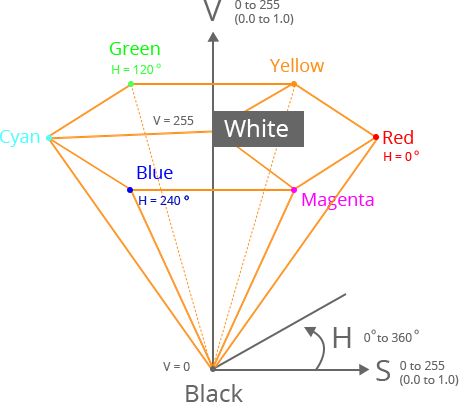

In [ ]:
rgb = original

hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)

print("HSV Shape: ", hsv.shape)

hue = hsv[:, :, 0]
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]

fig, ax = plt.subplots(ncols=5, figsize=(20, 12))

ax[0].imshow(rgb)
ax[0].set_title("RGB image")
ax[0].axis('off')

ax[1].imshow(hsv,cmap='hsv')
ax[1].set_title("HSV image")
ax[1].axis('off')

#Visualizando H-S-V
ax[2].imshow(hue, cmap='gray')
ax[2].set_title("Hue channel")
ax[2].axis('off')
ax[3].imshow(saturation,cmap='gray')
ax[3].set_title("Saturation channel")
ax[3].axis('off')
ax[4].imshow(value,cmap='gray')
ax[4].set_title("Value channel")
ax[4].axis('off')



print("Hue Range: ",hue.max(),hue.min())
print("Saturation Range: ",saturation.max(),saturation.min())
print("Value Range: ",value.max(),value.min())

#Prática 01: Modificando pixeis 
(Codificação com o professor)

**COLORIDO (3 Canais)**

In [ ]:
#Acessar os elementos atraves de suas coordenadas (X,Y coordinates)

im = original.copy()
print(im.shape)
h,w = im.shape[:2]

#Desenhar uma linha vertical (azul)


#Desenhar uma linha horizontal (verde)

plt.figure(figsize=(18,12))
plt.imshow(im)
plt.show()

** Nivel de Cinza (1 canal) **

In [ ]:
grayscale = cv2.cvtColor(original,cv2.COLOR_RGB2GRAY)

#Desenhe duas retas brancas se cruzando no centro da imagem



plt.figure(figsize=(20,10))
plt.imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
plt.show()




#Exercicio 01 - Funções de Desenho

Implemente as seguintes funções abaixo.



In [12]:
def draw_line(img, tl, br):
  #
  # Implemente aqui
  #
  return img

In [13]:
def draw_rect(img, tl, br):
  #
  # Implemente aqui
  #
  return img

#Exercício 2 - Funções OpenCV

Pesquise e implemente funções de desenho da Opencv

https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html